# Importing Libraries

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading Dataset

In [ ]:
df= pd.read_csv("/content/Mobiles Dataset (2025).csv", encoding='latin-1')

In [ ]:
df.head(5)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [ ]:
df.shape

(930, 15)

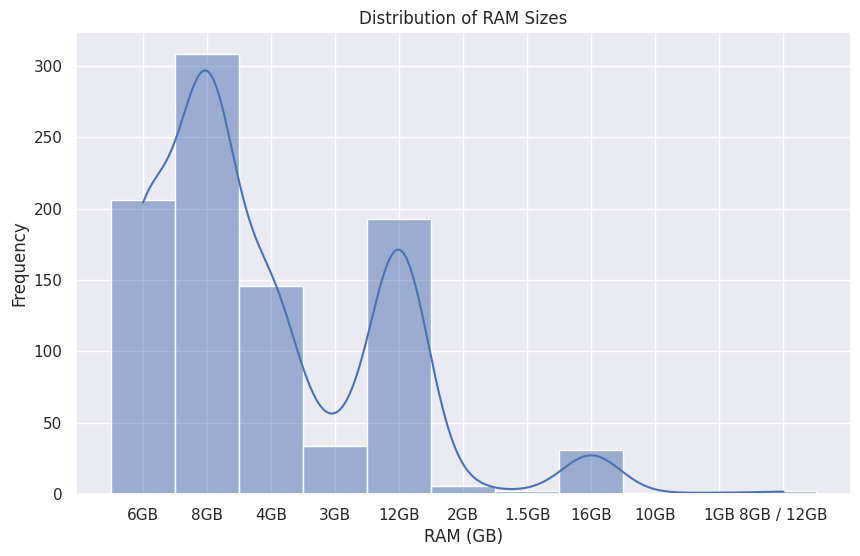

In [ ]:
# What is the distribution of RAM sizes across all phones?

# Distribution of RAM sizes
plt.figure(figsize=(10, 6))
sns.histplot(df['RAM'], kde=True)
plt.title('Distribution of RAM Sizes')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# What are the top 10 most popular mobile phone brands?

# Count occurrences of each brand
brand_counts = df['Company Name'].value_counts()

# Get the top 10 brands
top_10_brands = brand_counts.head(10)

top_10_brands


,count
Company Name,
Oppo,129
Apple,97
Honor,91
Samsung,88
Vivo,86
Realme,69
Motorola,62
Infinix,56
OnePlus,53


In [ ]:
# What is the average price of mobile phones in the dataset in India?

# Convert 'Launched Price (India)' column to numeric
df['Launched Price (India)'] = df['Launched Price (India)'].str.replace('INR', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Calculate the average price
average_price = df['Launched Price (India)'].mean()
print(f"The average price of mobile phones in the dataset is: {average_price}")

The average price of mobile phones in the dataset is: 50576.818279569896


The correlation between RAM size and price is: 0.4221917665125218


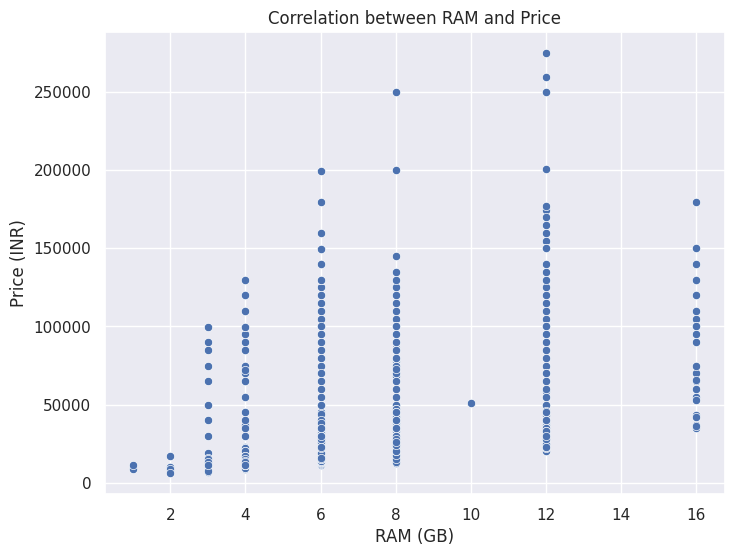

In [ ]:
# What is the correlation between RAM size and price?

# Extract numeric RAM values
df['RAM_numeric'] = df['RAM'].str.extract('(\d+)').astype(float)

# Calculate the correlation between RAM and price
correlation = df['RAM_numeric'].corr(df['Launched Price (India)'])
print(f"The correlation between RAM size and price is: {correlation}")

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RAM_numeric', y='Launched Price (India)', data=df)
plt.title('Correlation between RAM and Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (INR)')
plt.show()

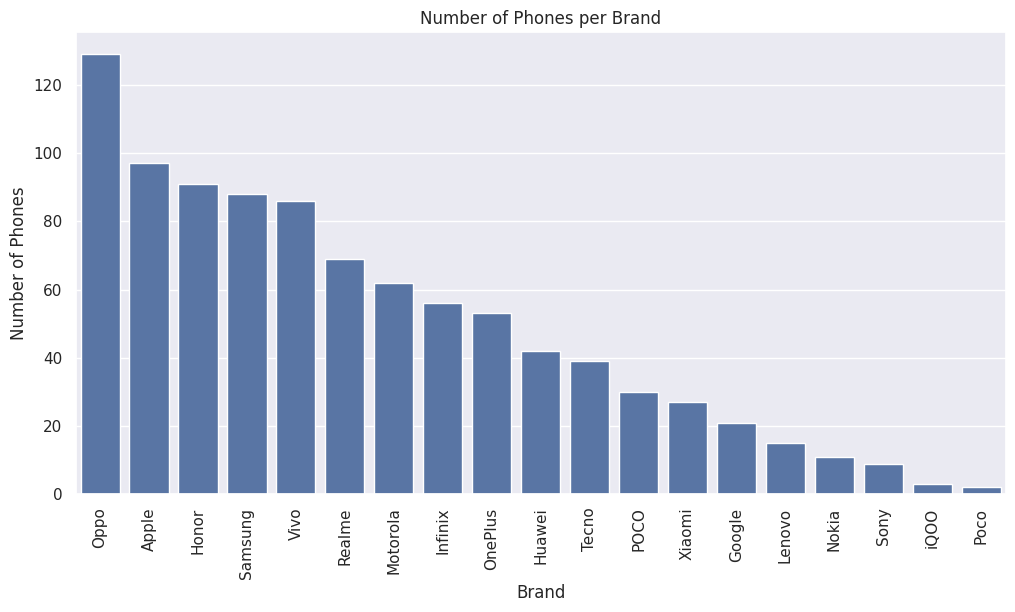

In [ ]:
# Plot a bar chart showing the number of phones per brand.

# Calculate the number of phones per brand
brand_counts = df['Company Name'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Number of Phones per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Phones')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


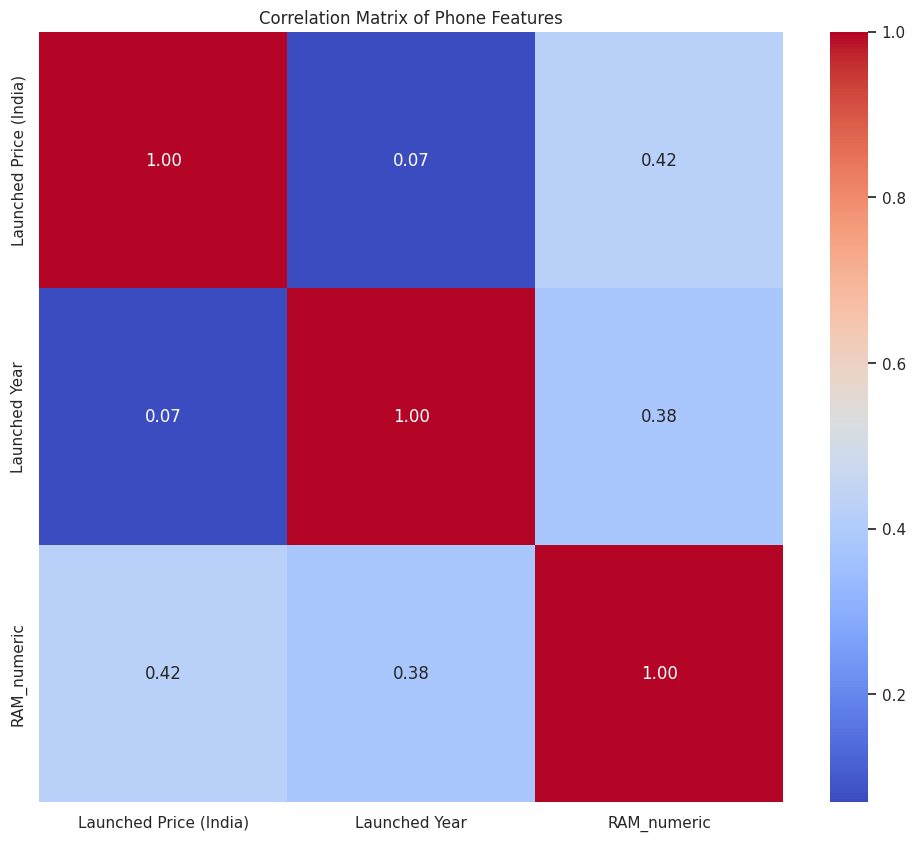

In [ ]:
# Plot a heatmap showing the correlation between different phone features.

# Calculate the correlation matrix
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Phone Features')
plt.show()

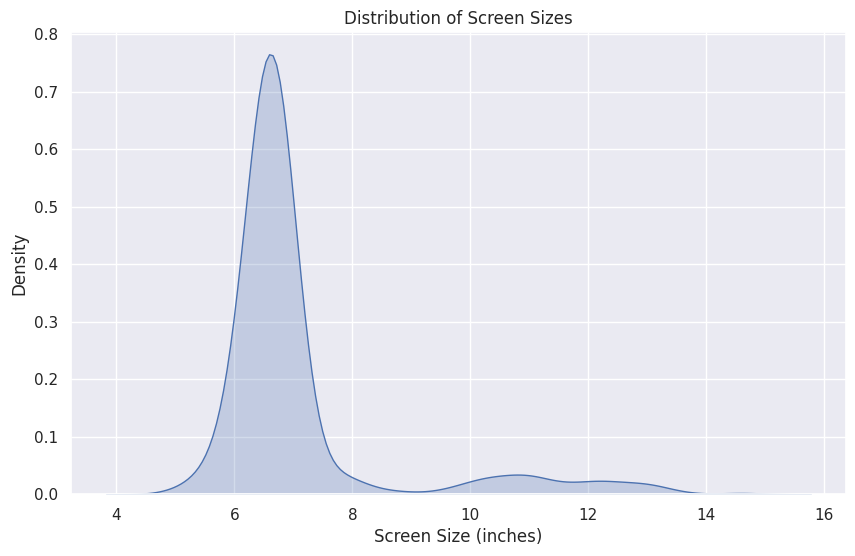

In [ ]:
# Visualize the distribution of screen sizes using a kernel density plot.

# Assuming 'Screen Size' column exists and contains numeric values.
# If not, you may need to preprocess the column to extract numeric screen sizes

# Convert 'Screen Size' to string type before using .str accessor
df['Screen Size'] = df['Screen Size'].astype(str)

# Extract numeric part from 'Screen Size' and convert to float
df['Screen Size'] = df['Screen Size'].str.extract('(\d+\.?\d*)').astype(float)

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Screen Size'], fill=True)
plt.title('Distribution of Screen Sizes')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Density')
plt.show()

In [ ]:
# What is the average battery capacity for each brand?

# Extract numeric battery capacity and convert to numeric
df['Battery Capacity'] = df['Battery Capacity'].str.replace(',', '', regex=False).str.extract('(\d+)').astype(float)

# Calculate the average battery capacity for each brand
average_battery_by_brand = df.groupby('Company Name')['Battery Capacity'].mean()

average_battery_by_brand

,Battery Capacity
Company Name,
Apple,4442.577320
Google,4341.047619
Honor,5488.461538
Huawei,4900.000000
Infinix,5330.357143
Lenovo,4520.000000
Motorola,4688.709677
Nokia,5309.090909
OnePlus,4840.377358


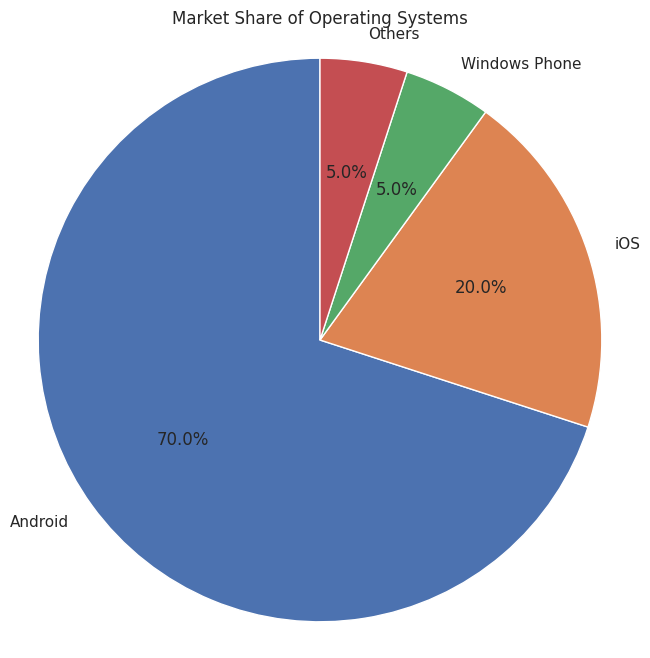

In [ ]:
# Create a pie chart showing the market share of different operating systems.

# Assuming 'OS' column represents the operating system and you have data for market share
# Replace this with your actual data
os_data = {'OS': ['Android', 'iOS', 'Windows Phone', 'Others'],
           'Market Share': [70, 20, 5, 5]}
os_df = pd.DataFrame(os_data)


plt.figure(figsize=(8, 8))
plt.pie(os_df['Market Share'], labels=os_df['OS'], autopct='%1.1f%%', startangle=90)
plt.title('Market Share of Operating Systems')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# Compare the average price of phones from Samsung and Apple.

# Calculate the average price for Samsung phones
samsung_avg_price = df[df['Company Name'] == 'Samsung']['Launched Price (India)'].mean()

# Calculate the average price for Apple phones
apple_avg_price = df[df['Company Name'] == 'Apple']['Launched Price (India)'].mean()

# Print the results
print(f"Average price of Samsung phones: {samsung_avg_price}")
print(f"Average price of Apple phones: {apple_avg_price}")

# Compare the average prices
if samsung_avg_price > apple_avg_price:
    print("Samsung phones have a higher average price than Apple phones.")
elif samsung_avg_price < apple_avg_price:
    print("Apple phones have a higher average price than Samsung phones.")
else:
    print("Samsung and Apple phones have the same average price.")


Average price of Samsung phones: 63605.5
Average price of Apple phones: 102998.59793814433
Apple phones have a higher average price than Samsung phones.
